Import Required Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.utils import resample
from sklearn.ensemble import VotingClassifier
import os
import itertools
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

Import Data from Data Scraping Notebook

In [2]:
df = pd.read_csv('Full_Shoe_Data_2019.csv',index_col=0)

Remove unnecessary columns and create a column that gives the season of the release

In [3]:
df['releaseDate']= pd.to_datetime(df['releaseDate']) #make column a datetime object
df.drop(columns= ['urlKey', 'title', 'productCategory', 'contentGroup', 'primaryCategory', 'colorway', 'year','Shoe'], inplace=True)
df["month"] = df['releaseDate'].map(lambda x: x.month) #extract the month from datetime object
month_dict= {12:1,1:1,2:1,3:2,4:2,5:2,6:3,7:3,8:3,9:4,10:4,11:4} #create a dictionary to iterate through
df['Season']= df['month'].map(month_dict) #create a new column by mapping the dictionary onto the month column

In [4]:
df= df[df['retailPrice']<=350] #Remove Outliers

# EDA

## Anova

Hypothesis Testing:

Null: No statistical difference between Season Released and Average Profit

Alternative: There is a statisitcal difference between Season Released and Average Profit

In [5]:
stats.f_oneway(df['Avg_Profit'][df['Season'] == 1],
               df['Avg_Profit'][df['Season'] == 2],
               df['Avg_Profit'][df['Season'] == 3],
               df['Avg_Profit'][df['Season'] == 4])

F_onewayResult(statistic=1.3846183630485243, pvalue=0.24566519506022022)

We CAN NOT reject the null hypothesis because our pvalue is Greater Than 0.05 (alpha set at .05).
Therefore we see there is no statistical difference between Season Released and Average Profit.

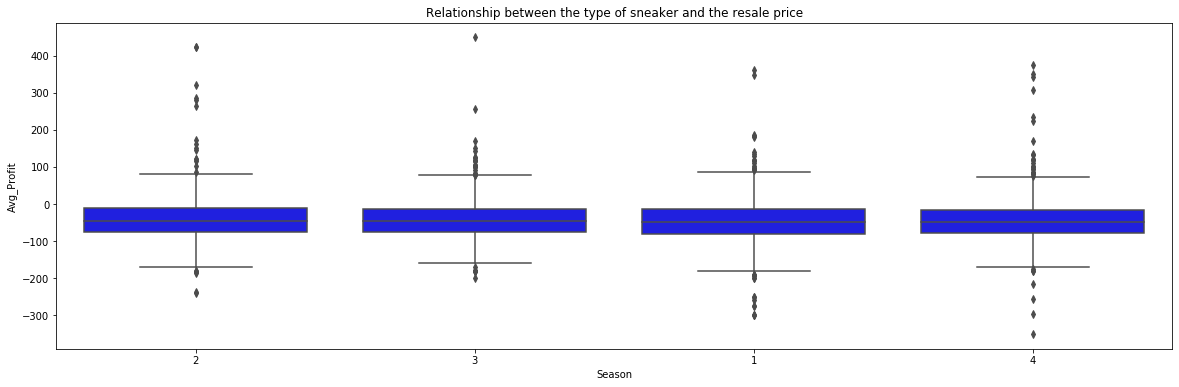

In [6]:
min_order = df.groupby('Season')['Avg_Profit'].median().sort_values(ascending = False).index
plt.figure(figsize=(20,6))
plt.title('Relationship between the type of sneaker and the resale price')
sns.boxplot(x='Season',y='Avg_Profit',data=df,color='b', order=min_order);

## Anova

Hypothesis Testing:

Null: No statistical difference between Sneaker Category and Retail Price.


Alternative: There is a statisitcal difference between Sneaker Category and Retail Price.

In [7]:
stats.f_oneway(df['retailPrice'][df['secondaryCategory'] == 'Other'],
               df['retailPrice'][df['secondaryCategory'] == 'Running'],
               df['retailPrice'][df['secondaryCategory'] == 'One'],
               df['retailPrice'][df['secondaryCategory'] == '95'],
               df['retailPrice'][df['secondaryCategory'] == 'VaporMax'],
               df['retailPrice'][df['secondaryCategory'] == 'Ultra Boost'],
               df['retailPrice'][df['secondaryCategory'] == '90'],
               df['retailPrice'][df['secondaryCategory'] == '97'],
               df['retailPrice'][df['secondaryCategory'] == 'NMD'],
               df['retailPrice'][df['secondaryCategory'] == '1'],
               df['retailPrice'][df['secondaryCategory'] == '97'],
               df['retailPrice'][df['secondaryCategory'] == 'Training'],
               df['retailPrice'][df['secondaryCategory'] == 'Kyrie'],
               df['retailPrice'][df['secondaryCategory'] == '97'],
               df['retailPrice'][df['secondaryCategory'] == 'Soccer'],
               df['retailPrice'][df['secondaryCategory'] == 'Basketball'],
               df['retailPrice'][df['secondaryCategory'] == 'Yeezy'],
               df['retailPrice'][df['secondaryCategory'] == '98'],
               df['retailPrice'][df['secondaryCategory'] == '270'],
               df['retailPrice'][df['secondaryCategory'] == 'Sixteen'],
               df['retailPrice'][df['secondaryCategory'] == 'Plus'],
               df['retailPrice'][df['secondaryCategory'] == 'SB Dunk Low'],
               df['retailPrice'][df['secondaryCategory'] == 'Twelve'],
               df['retailPrice'][df['secondaryCategory'] == 'Four'],
               df['retailPrice'][df['secondaryCategory'] == 'Tennis'],
               df['retailPrice'][df['secondaryCategory'] == 'SB Dunk High'],
               df['retailPrice'][df['secondaryCategory'] == 'Seventeen'],
               df['retailPrice'][df['secondaryCategory'] == 'A.D.'],
               df['retailPrice'][df['secondaryCategory'] == 'Eleven'],
               df['retailPrice'][df['secondaryCategory'] == 'Pro'],
               df['retailPrice'][df['secondaryCategory'] == 'Zoom Rookie'],
               df['retailPrice'][df['secondaryCategory'] == 'Zoom Soldier'],
               df['retailPrice'][df['secondaryCategory'] == 'Five'],
               df['retailPrice'][df['secondaryCategory'] == 'Janoski'],
               df['retailPrice'][df['secondaryCategory'] == 'Dunk'],
               df['retailPrice'][df['secondaryCategory'] == 'SB Dunk Mid'],
               df['retailPrice'][df['secondaryCategory'] == 'Dunk High'],
               df['retailPrice'][df['secondaryCategory'] == '720']               
              )

F_onewayResult(statistic=15.348894007138265, pvalue=2.770159520687728e-83)

We CAN reject the null hypothesis because our pvalue is Less Than 0.05 (alpha set at .05). Therefore we see there is a statistical difference between Sneaker Category and Retail Price.

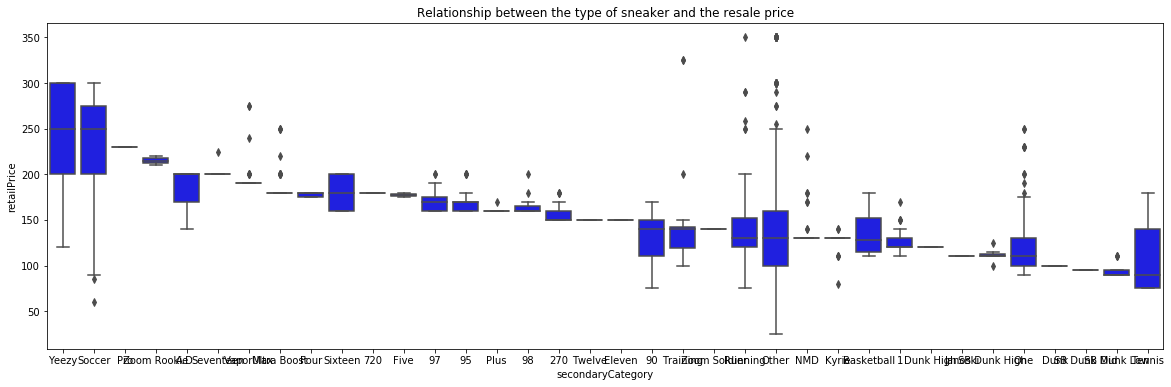

In [8]:
min_order = df.groupby('secondaryCategory')['retailPrice'].median().sort_values(ascending = False).index
plt.figure(figsize=(20,6))
plt.title('Relationship between the type of sneaker and the resale price')
sns.boxplot(x='secondaryCategory',y='retailPrice',data=df,color='b', order=min_order);

## Two Sample T-Test

Hypothesis Testing:

Null: No statistical difference between Average Profit for Nike Sneakers and Average Profit for Adidas Sneakers.

Alternative: There is a statisitcal difference between Average Number of Sales for Nike Sneakers and Average Number of Sales for Adidas Sneakers.

In [9]:
Nike_df = df[df['brand']=='Nike']
Adidas_df = df[df['brand']=='adidas']

In [10]:
stats.ttest_ind(Nike_df['Avg_Profit'],Adidas_df['Avg_Profit'], equal_var = False)

Ttest_indResult(statistic=4.438607274640398, pvalue=1.0073440913134453e-05)

In [47]:
df_plot= df.groupby('brand')['Avg_Profit'].mean()

In [51]:
df_plot

brand
Nike     -39.364750
adidas   -54.333447
Name: Avg_Profit, dtype: float64

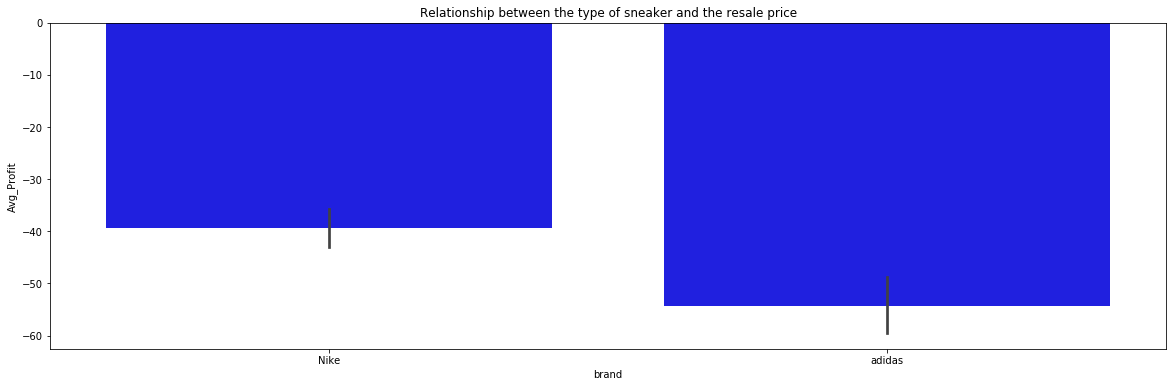

In [54]:
plt.figure(figsize=(20,6))
plt.title('Relationship between the type of sneaker and the resale price')
sns.barplot(x='brand',y='Avg_Profit',data=df,color='b');

We CAN reject the null hypothesis because our pvalue is less than 0.05.

This tells us that there is a statisitcal difference between Average Profit for Nike and Adidas Sneakers

# Categorical Modeling

Based on our data we see that less than 25% of shoes that came out in 2019 were profitable and even less are worth the time it takes to acquire one of these shoes. Due to this we are going to start with a categorical model to predict if a shoe will resale at a high enough value to even consider buying (Profit > $50).

In [11]:
df_modeling= df.drop(columns= ['Avg_Sale', 'Avg_Return', 'month','releaseDate','Best_Size', 'usHtsDescription','name'])
df_modeling= pd.get_dummies(data= df_modeling, columns= ['brand', 'secondaryCategory', 'shoe'])
df_modeling['Target']= np.where(df_modeling['Avg_Profit']>=50, 1, 0)
df_modeling.drop(columns='Avg_Profit', inplace= True)

In [12]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression

In [13]:
target = df_modeling['Target']
features = df_modeling.drop(['Target'], axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=25,test_size=0.30)

log = LogisticRegression()
log.fit(X_train, y_train)
log_preds = log.predict(X_test)

log_f1 = metrics.f1_score(y_test, log_preds)
log_acc = metrics.accuracy_score(y_test, log_preds)

print('Test f1 score: ', log_f1)
print('Test Accuracy score: ', log_acc)

Test f1 score:  0.19512195121951217
Test Accuracy score:  0.9436860068259386


/Users/avidanberman/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[549   1]
 [ 32   4]]


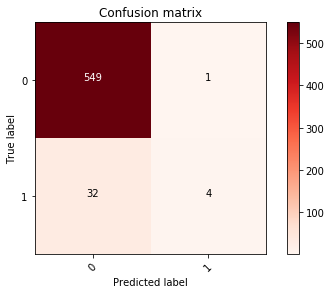

In [38]:
cm = confusion_matrix(y_test,log_preds)
classes = ['0','1']
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Reds)

While we see a high Accuracy score, we have an incredibly low F1 score. This is likely due to our class imbalance and we need to fix that. Additionally we have a very high false positive rate which is a negative.

## Logistic Regression without Class Imbalance

In [39]:
log = LogisticRegression(class_weight='balanced')
log.fit(X_train, y_train)
log_preds = log.predict(X_test)

log_f1 = metrics.f1_score(y_test, log_preds)
log_acc = metrics.accuracy_score(y_test, log_preds)

print('Test f1 score: ', log_f1)
print('Test Accuracy score: ', log_acc)

Test f1 score:  0.3622047244094488
Test Accuracy score:  0.8617747440273038


/Users/avidanberman/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[482  68]
 [ 13  23]]


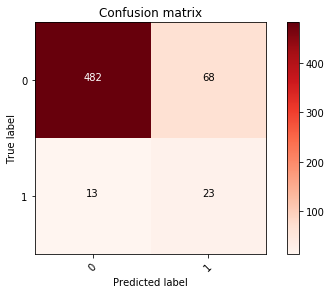

In [40]:
cm = confusion_matrix(y_test,log_preds)
classes = ['0','1']
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Reds)

So by solving for our class imbalace we improved the F-1 Score but we still have a high false positive rate which is bad.

## F-Test Feature Selection

In [18]:
scaler = StandardScaler()
# fit the scaler to the training data
scaler.fit(X_train)
#transform the training data
X_train1 = pd.DataFrame(data = scaler.transform(X_train), columns = features.columns)
#transform the testing dat
X_test1 = pd.DataFrame(data = scaler.transform(X_test), columns = features.columns)

selector = SelectKBest(f_regression, k=22)

selector.fit(X_train1, y_train)

selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

log_kbest = LogisticRegression(class_weight= 'balanced')
log_kbest = log_kbest.fit(X_train1[selected_columns], y_train)

log_kpreds = log_kbest.predict(X_test1[selected_columns])

log_kf1 = metrics.f1_score(y_test, log_kpreds)
log_kacc = metrics.accuracy_score(y_test, log_kpreds)
print('Test F1 Score:', log_kf1)
print('Test Accuracy score: ', log_kacc)

Test F1 Score: 0.34615384615384615
Test Accuracy score:  0.9419795221843004


/Users/avidanberman/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/avidanberman/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/avidanberman/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/avidanberman/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


[[543   7]
 [ 27   9]]


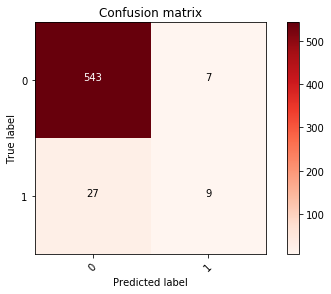

In [19]:
cm = confusion_matrix(y_test,log_kpreds)
classes = ['0','1']
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Reds)

Using a F-Test Feature Selector we found that this model has less false positives but has a worse F1 score. I lean towards this being the better model purely do to having less false positives.

## Gridsearch on Logistic Regression

In [20]:
logreg = LogisticRegression()
parameters = {'C': [0.75,1.0,1.25,1.5],
             'max_iter': [100,200,300,400,500],
             'penalty': ['l1', 'l2']}
grid_tree1=GridSearchCV(logreg, parameters, cv=5, scoring='f1',verbose =1,n_jobs=-1)

grid_tree1.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.5s finished
/Users/avidanberman/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.75, 1.0, 1.25, 1.5],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2']},
             scoring='f1', verbose=1)

In [21]:
# Single best score achieved across all params (min_samples_split)
print(grid_tree1.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree1.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree1.best_estimator_)

0.2766290726817043
{'C': 1.5, 'max_iter': 200, 'penalty': 'l2'}
LogisticRegression(C=1.5, max_iter=200)


In [22]:
#Predict the response for test dataset
y_pred = grid_tree1.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Test F1 Score:",metrics.f1_score(y_test, y_pred))
print("Test Accuracy Score:",metrics.accuracy_score(y_test, y_pred))

Test F1 Score: 0.27906976744186046
Test Accuracy Score: 0.947098976109215


[[549   1]
 [ 30   6]]


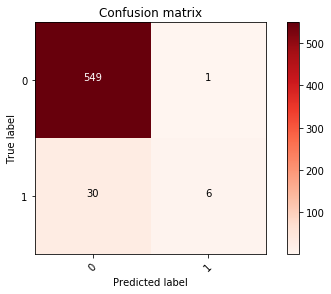

In [23]:
cm = confusion_matrix(y_test,y_pred)
classes = ['0','1']
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Reds)

We get a significantly worse F1 Score but a better rate on the false positives, the lack of predictive ability of this model causes for me to pick the F-Test Model.

## Decision Tree Model

In [24]:
dtc = DecisionTreeClassifier(random_state = 25)

dtc.fit(X_train, y_train)

dtc_preds  = dtc.predict(X_test)

dtc_f1 = metrics.f1_score(y_test, dtc_preds)

dtc_acc = metrics.accuracy_score(y_test, dtc_preds)

print('Test F1 score: ', dtc_f1)
print('Test Accuracy score: ', dtc_acc)

Test F1 score:  0.41509433962264153
Test Accuracy score:  0.947098976109215


[[544   6]
 [ 25  11]]


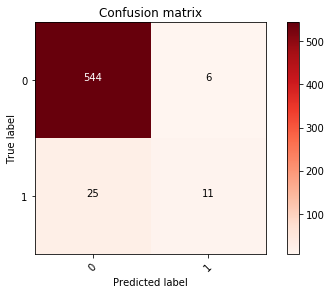

In [25]:
cm = confusion_matrix(y_test,dtc_preds)
classes = ['0','1']
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Reds)

This is quite a good showing for our decision tree, it has a better F1 score than our F-Test model but still has a high false positive rate. I don't love that and hope to find a better model.

## Random Forest Model

In [26]:
rfc = RandomForestClassifier(random_state = 25, n_estimators=100, max_features=10)
rfc.fit(X_train, y_train)
rfc_preds = rfc.predict(X_test)

rfc_f1 = metrics.f1_score(y_test, rfc_preds)
rfc_acc = metrics.accuracy_score(y_test, rfc_preds)

# checking accuracy on the test data
print('Test F1 score: ', rfc_f1)
print('Test Accuracy score: ', rfc_acc)

Test F1 score:  0.40816326530612246
Test Accuracy score:  0.9505119453924915


[[547   3]
 [ 26  10]]


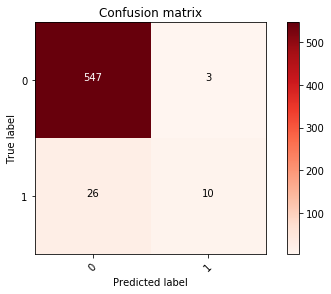

In [27]:
cm = confusion_matrix(y_test,rfc_preds)
classes = ['0','1']
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Reds)

This is our best score so far, it has the higher F1 score than the F-Test Model and has a better false positive rate than the Decision Tree Model.

## Voting Classifier

In [31]:
voting_clf = VotingClassifier(
                estimators=[('decisiontree', dtc), ('logreg', log), ('randomforest', rfc)], 
                voting='hard', weights= [1,1,1])

voting_clf.fit(X_train, y_train)

vc_preds = voting_clf.predict(X_test)

vc_f1 = metrics.f1_score(y_test, vc_preds)

vc_acc = metrics.accuracy_score(y_test, vc_preds)

print('Test F1 score: ', vc_f1)
print('Test Accuracy score: ', vc_acc)

/Users/avidanberman/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Test F1 score:  0.4444444444444444
Test Accuracy score:  0.9488054607508533


[[544   6]
 [ 24  12]]


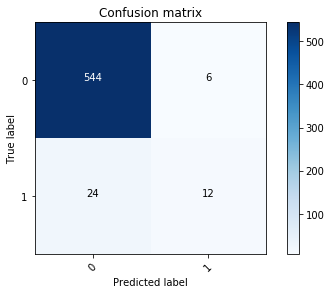

In [32]:
cm = confusion_matrix(y_test,vc_preds)
classes = ['0','1']
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues)

Our voting classifier has a better F1 score than our Random Forest but has a worse false positive rate. The better false positive rate pushes me towards the Random Forest Model.

## XG-Boost

In [33]:
labels = df_modeling['Target']
labels_removed_df = df_modeling.drop(columns='Target')

scaler = StandardScaler()
scaled_df = scaler.fit_transform(labels_removed_df)

X_train, X_test, y_train, y_test = train_test_split(scaled_df, labels)

In [34]:
param_grid = {
    "penalty": (["l1"]),
    "C": ([0.001]),
    'learning_rate': [.1,.2,.3],
    "solver": ("newton-cg", "lbfgs", "liblinear"),
    'clf__max_depth': [2],
    'clf__min_samples_split': ([2]),
    'clf__min_samples_leaf': ([1])
}

In [35]:
clf = xgb.XGBClassifier()
grid_clf = GridSearchCV(clf, param_grid, scoring='f1', cv=20, n_jobs=-1,verbose=1)
grid_clf.fit(scaled_df, labels)
best_parameters = grid_clf.best_params_
print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))
training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)
f1_train= f1_score(y_train, training_preds)
f1_val= f1_score(y_test, val_preds)
print("")
print("Training Accuracy Score: {:.4}%".format(training_accuracy * 100))
print("Training F1 Score: {:.4}%".format(f1_train * 100))
print("Test Accuracy Score: {:.4}%".format(val_accuracy * 100))
print("Test F1 Score: {:.4}%".format(f1_val * 100))

Fitting 20 folds for each of 9 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/avidanberman/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.9min finished


Grid Search found the following optimal parameters: 
C: 0.001
clf__max_depth: 2
clf__min_samples_leaf: 1
clf__min_samples_split: 2
learning_rate: 0.3
penalty: 'l1'
solver: 'newton-cg'

Training Accuracy Score: 95.9%
Training F1 Score: 46.43%
Test Accuracy Score: 95.29%
Test F1 Score: 46.51%


[[455   1]
 [ 22  10]]


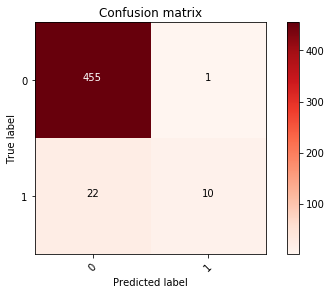

In [36]:
cm = confusion_matrix(y_test,val_preds)
classes = ['0','1']
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Reds)

We have found that our XG-Boost model has performed better than our Random Forest model. It has both a better F1 score and a solid false positive rate. This is our best model.